In [ ]:
'''
Problem Statement:

I decided to treat this as a classification problem by creating a new binary variable affair (did the woman have at least one
affair?) and trying to predict the classification for each woman.
Dataset
The dataset I chose is the affairs dataset that comes with Statsmodels. It was derived from a survey of women in 1974 by
Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about
the study is available in a 1978 paper from the Journal of Political Economy.
Description of Variables
The dataset contains 6366 observations of 9 variables:
    (1) rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)
    (2) age: woman's age
    (3) yrs_married: number of years married
    (4) children: number of children
    (5) religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
    (6) educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some 
        graduate school, 20 = advanced degree)
    (7) occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/
        writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
    (8) occupation_husb: husband's occupation (same coding as above)
    (9) affairs: time spent in extra-marital affairs
Code to loading data and modules
'''

In [4]:
# Import python modules
%matplotlib inline 
# for numerical and array operation
import numpy as np
# for exploring the data
import pandas as pd
# for Data visualisation
import matplotlib.pyplot as plt
# for preparing the data for logistic regression using dmatrices from patsy
from patsy import dmatrices as dmatrices
# for loading a dataset from statsmodels and Logistics regression data fitting
import statsmodels.api as sm

# Import sklearn and scipy.stats for statistical analysis
import scipy.stats as stats
# building a logistic regression model and model evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# 1. Details about data
# Affair data is available at  statsmodel.datasets
print("1. Details abouts data: \n")
print("Name: ",sm.datasets.fair.TITLE,"\n")
print("Descrption: ",sm.datasets.fair.DESCRLONG,"\n")
print("Note-",sm.datasets.fair.NOTE,"\n")
print(sm.datasets.fair.SOURCE,"\n")

1. Details abouts data: 

Name:  Affairs dataset 

Descrption:  Extramarital affair data used to explain the allocation
of an individual's time among work, time spent with a spouse, and time
spent with a paramour. The data is used as an example of regression
with censored data. 

Note- ::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                       

In [7]:
# 2. Load the data and convert it into pandas dataframe
df_Affairdata = sm.datasets.fair.load_pandas().data
print("Sample observation from data")
df_Affairdata.head(2)

Sample observation from data


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769


In [8]:
'''
We have to identify that Womens have extra maritial affairs or not. If it's yes then what is the percenatge ratio of that.
Hence add-up a binary variable "affair" in DataFrame based upon "affairs" columns of dataframe which describe time spent in
extramarital affairs by womens. If Womens "spends any time" in an affair, this is counted as a yes or 1, otherwise it's zero.
'''
df_Affairdata['affair']=df_Affairdata['affairs'].map(lambda x:1 if x> 0 else 0)
print("Sample of data after 'affair' columns add in dataframe")
df_Affairdata.head(3)

Sample of data after 'affair' columns add in dataframe


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1


In [9]:
# 3. Values of affair column and Hypothesis about data
# Values of affair column
print("Unique values of affair column")
df_Affairdata['affair'].unique()

Unique values of affair column


array([1, 0], dtype=int64)

In [10]:
# 4. Structure of Data
print("The No. of rows in data : {0}\nThe No. of columns in data : {1}" .format(str(df_Affairdata.shape[0]),str(df_Affairdata.shape[1])))
print("\nColumns of Affair data : ", df_Affairdata.columns.tolist())

The No. of rows in data : 6366
The No. of columns in data : 10

Columns of Affair data :  ['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ', 'occupation', 'occupation_husb', 'affairs', 'affair']


In [ ]:
# 5. Statistical analysis of Data and it's features
# a) Statistics about data based upon affair
print("Statistics about data based upon affair")
df_Affairdata.groupby('affair').mean()

In [12]:
# b) Statistics about data based upon marriage rating
print("Statistics about data based upon marriage rating")
df_Affairdata.groupby('rate_marriage').mean()

Statistics about data based upon marriage rating


,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


In [13]:
# c)  Statistics about data based upon years of marriage
print(" Statistics about data based upon years of marriage")
df_Affairdata.groupby('yrs_married').mean()

 Statistics about data based upon years of marriage


,rate_marriage,age,children,religious,educ,occupation,occupation_husb,affairs,affair
yrs_married,,,,,,,,,
0.5,4.524324,22.156757,0.048649,2.454054,14.237838,3.302703,3.502703,0.546486,0.043243
2.5,4.239921,23.640364,0.297198,2.312684,14.384956,3.383481,3.614061,0.984877,0.215831
6.0,4.066608,26.439089,1.036810,2.347064,14.454864,3.469763,3.881683,0.741184,0.339176
9.0,3.985050,28.985050,1.649502,2.368771,14.367110,3.393688,4.061462,0.737495,0.421927
13.0,4.038983,32.610169,1.916102,2.457627,14.218644,3.474576,4.100000,0.508149,0.411864
16.5,3.952323,35.135697,2.814181,2.601467,13.710269,3.415648,4.014670,0.484304,0.451100
23.0,3.956843,41.013564,3.281751,2.652281,13.794081,3.511714,4.051788,0.369099,0.425401


In [14]:
# d) Statistics about data based upon religious values
print("Statistics about data based upon religious values")
df_Affairdata.groupby('religious').mean()

Statistics about data based upon religious values


,rate_marriage,age,yrs_married,children,educ,occupation,occupation_husb,affairs,affair
religious,,,,,,,,,
1.0,4.077375,27.704212,7.439765,1.041626,14.441724,3.431929,3.902057,1.246989,0.399608
2.0,4.021173,28.618218,8.650640,1.334804,13.985002,3.369210,3.820026,0.767282,0.361270
3.0,4.141206,29.536953,9.436416,1.492981,14.175475,3.439306,3.828241,0.545039,0.291908
4.0,4.349085,31.157774,11.115854,1.809451,14.753049,3.545732,3.954268,0.240431,0.181402


In [15]:
# e) Statistical observation of affair data
print("Statistical observation of affair data")
df_Affairdata.describe()

Statistical observation of affair data


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [17]:
# f) To find out how many people have extra maritial affairs
print("Total availabale data in affairs data :", len(df_Affairdata))
df_Affairdata['affair'].value_counts()

Total availabale data in affairs data : 6366


0    4313
1    2053
Name: affair, dtype: int64

In [18]:
df_Affairdata['affair'].value_counts(normalize=True)*100

0    67.75055
1    32.24945
Name: affair, dtype: float64

In [19]:
# g) NULL or NA data verification in affair data
print("NULL or NA data in affair data")
df_Affairdata.isnull().sum()

NULL or NA data in affair data


rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

In [20]:
df_Affairdata.isna().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

# Data Visualisation

Text(0,0.5,'Frequency')

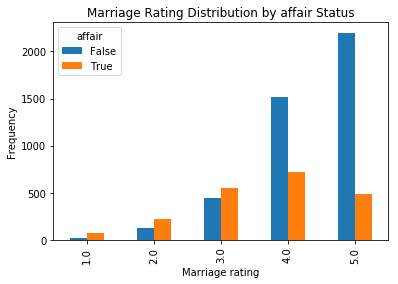

In [21]:
# a ) bar-plot between marriage rating and affair
# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(df_Affairdata['rate_marriage'], df_Affairdata['affair'].astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by affair Status')
plt.xlabel('Marriage rating')
plt.ylabel('Frequency')

bar-plot between age and affair


Text(0,0.5,'Frequency')

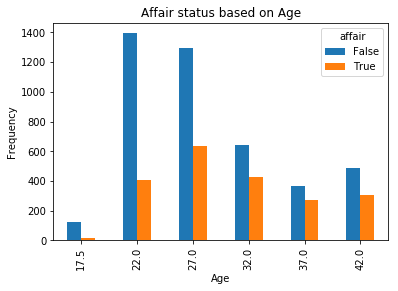

In [22]:
# b ) bar-plot between age and affair
print("bar-plot between age and affair")
pd.crosstab(df_Affairdata['age'], df_Affairdata['affair'].astype(bool)).plot(kind='bar')
plt.title('Affair status based on Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

bar-plot between Years of Marriage and affair


Text(0,0.5,'Frequency')

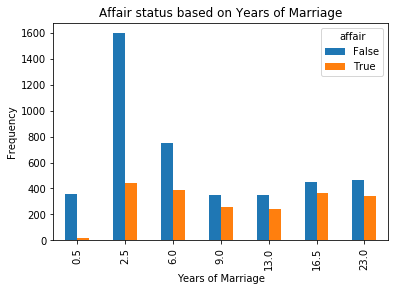

In [23]:
# c ) bar-plot between Years of Marriage and affair
print("bar-plot between Years of Marriage and affair")
pd.crosstab(df_Affairdata['yrs_married'], df_Affairdata['affair'].astype(bool)).plot(kind='bar')
plt.title('Affair status based on Years of Marriage')
plt.xlabel('Years of Marriage')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

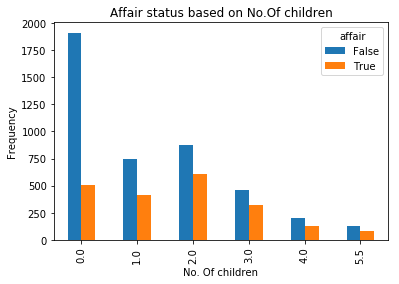

In [25]:
# d ) bar-plot between children and affair
pd.crosstab(df_Affairdata['children'], df_Affairdata['affair'].astype(bool)).plot(kind='bar')
plt.title('Affair status based on No.Of children')
plt.xlabel('No. Of children')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

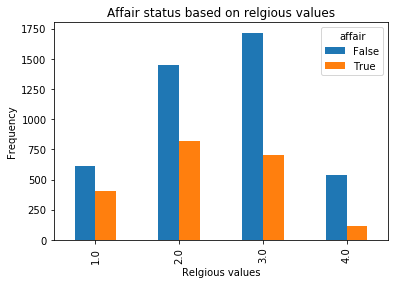

In [26]:
# e ) bar-plot between religious and affair
pd.crosstab(df_Affairdata['religious'], df_Affairdata['affair'].astype(bool)).plot(kind='bar')
plt.title('Affair status based on relgious values')
plt.xlabel('Relgious values')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

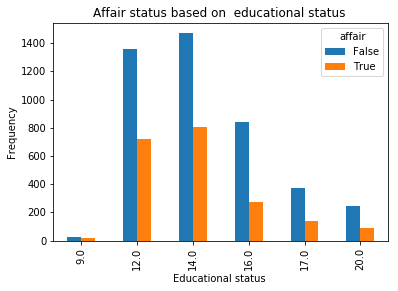

In [27]:
# f ) bar-plot between educational status and affair
pd.crosstab(df_Affairdata['educ'], df_Affairdata['affair'].astype(bool)).plot(kind='bar')
plt.title('Affair status based on  educational status ')
plt.xlabel('Educational status ')
plt.ylabel('Frequency')

# Logistic Regression

## Prepare Data for Logistic Regression

In [29]:
df_Affairdata['occupation'].unique()

array([2., 3., 5., 4., 1., 6.])

In [30]:
df_Affairdata['occupation_husb'].unique()

array([5., 4., 3., 2., 6., 1.])

In [32]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ \
                  + C(occupation) + C(occupation_husb)', df_Affairdata, return_type="dataframe")
help(dmatrices)

Help on function dmatrices in module patsy.highlevel:

dmatrices(formula_like, data={}, eval_env=0, NA_action='drop', return_type='matrix')
    Construct two design matrices given a formula_like and data.
    
    This function is identical to :func:`dmatrix`, except that it requires
    (and returns) two matrices instead of one. By convention, the first matrix
    is the "outcome" or "y" data, and the second is the "predictor" or "x"
    data.
    
    See :func:`dmatrix` for details.



In [33]:
# observation from dataframe return by dmatrices
X.head(2)

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0


In [34]:
# Columns in dataframe return by dmatrices
X.columns.tolist()

['Intercept',
 'C(occupation)[T.2.0]',
 'C(occupation)[T.3.0]',
 'C(occupation)[T.4.0]',
 'C(occupation)[T.5.0]',
 'C(occupation)[T.6.0]',
 'C(occupation_husb)[T.2.0]',
 'C(occupation_husb)[T.3.0]',
 'C(occupation_husb)[T.4.0]',
 'C(occupation_husb)[T.5.0]',
 'C(occupation_husb)[T.6.0]',
 'rate_marriage',
 'age',
 'yrs_married',
 'children',
 'religious',
 'educ']

In [35]:
# Rename columns of " X " 
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_women_2',
                        'C(occupation)[T.3.0]':'occ_women_3',
                        'C(occupation)[T.4.0]':'occ_women_4',
                        'C(occupation)[T.5.0]':'occ_women_5',
                        'C(occupation)[T.6.0]':'occ_women_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})
X.columns.tolist()

['Intercept',
 'occ_women_2',
 'occ_women_3',
 'occ_women_4',
 'occ_women_5',
 'occ_women_6',
 'occ_husb_2',
 'occ_husb_3',
 'occ_husb_4',
 'occ_husb_5',
 'occ_husb_6',
 'rate_marriage',
 'age',
 'yrs_married',
 'children',
 'religious',
 'educ']

In [36]:
y.head()

,affair
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


# Logistic Regression using Statsmodels.api

In [38]:
from statsmodels.api import Logit
# Assign Logit Model output into variable 

log_Reg_SM = Logit(df_Affairdata['affair'],X)
results=log_Reg_SM.fit()

Optimization terminated successfully.
         Current function value: 0.542911
         Iterations 6


In [39]:
print("Summary of Logistics Regression with StatsModel")
print(results.summary2())

Summary of Logistics Regression with StatsModel
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.137      
Dependent Variable: affair           AIC:              6946.3465  
Date:               2018-10-18 19:43 BIC:              7061.2449  
No. Observations:   6366             Log-Likelihood:   -3456.2    
Df Model:           16               LL-Null:          -4002.5    
Df Residuals:       6349             LLR p-value:      1.5339e-222
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
Intercept          2.9708   0.5722   5.1917 0.0000  1.8492  4.0923
occ_women_2        0.3902   0.4476   0.8719 0.3832 -0.4869  1.2674
occ_women_3        0.7027   0.4415   1.5

# Logistic Regression using sklearn

In [40]:
from sklearn.linear_model import LogisticRegression
# instantiate a logistic regression model, and fit with X and y
log_reg_Sklearn= LogisticRegression()
log_Reg_model = log_reg_Sklearn.fit(X, np.ravel(y))
log_Reg_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
# Acccuracy prediction on the training set
log_Reg_model.score(X,y)

0.7258875274897895

In [42]:
y.mean()

affair    0.322495
dtype: float64

In [43]:
print("The Intercept values is : ", log_Reg_model.intercept_[0])
print("\nFeatures and their Coefficients are: \n")
print(pd.DataFrame(list(zip(X.columns,np.transpose(log_Reg_model.coef_[0]))), columns=['Features','Coefficients']))

The Intercept values is :  1.4898837457180918

Features and their Coefficients are: 

         Features  Coefficients
0       Intercept      1.489884
1     occ_women_2      0.188046
2     occ_women_3      0.498926
3     occ_women_4      0.250647
4     occ_women_5      0.838983
5     occ_women_6      0.833921
6      occ_husb_2      0.190547
7      occ_husb_3      0.297745
8      occ_husb_4      0.161319
9      occ_husb_5      0.187683
10     occ_husb_6      0.193917
11  rate_marriage     -0.703120
12            age     -0.058418
13    yrs_married      0.105677
14       children      0.016920
15      religious     -0.371135
16           educ      0.004016


# Model Evaluation Using a Validation Set

In [44]:
# Split of data can be sone through sklearn.model_selection methon train_tets_split
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=0)
print("The Size of Fetures data(X) for Training set" , X_train.shape)
print("The Size of Fetures data(X) for Test set" , X_test.shape)
print("The Size of Target data(y) for Training set" , y_train.shape)
print("The Size of Target data(y) for Training set" , y_test.shape)

The Size of Fetures data(X) for Training set (4456, 17)
The Size of Fetures data(X) for Test set (1910, 17)
The Size of Target data(y) for Training set (4456, 1)
The Size of Target data(y) for Training set (1910, 1)


In [45]:
# Apply Logistic Regression model
# evaluate the model by splitting into train and test sets
log_regssion_model_train= LogisticRegression()
log_regssion_model_train.fit(X_train,np.ravel(y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
# predict class labels for the test set
y_predict = log_regssion_model_train.predict(X_test)
y_predict

array([1., 0., 0., ..., 0., 0., 0.])

In [47]:
# generate class probabilities
y_probs = log_regssion_model_train.predict_proba(X_test)
y_probs

array([[0.35146338, 0.64853662],
       [0.90955084, 0.09044916],
       [0.72567333, 0.27432667],
       ...,
       [0.55727384, 0.44272616],
       [0.81207046, 0.18792954],
       [0.74734603, 0.25265397]])

# Model Evaluation

### Confusion matrix

In [49]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
print("Confusion matrix \n",confusion_matrix)

Confusion matrix 
 [[1169  134]
 [ 382  225]]


### Classification Report

In [50]:
classification_report= metrics.classification_report(y_test, y_predict)
print("Classification Report \n",classification_report)

Classification Report 
              precision    recall  f1-score   support

        0.0       0.75      0.90      0.82      1303
        1.0       0.63      0.37      0.47       607

avg / total       0.71      0.73      0.71      1910



### Model Accuracy

In [51]:
model_accuracy = log_regssion_model_train.score(X_test,y_test)
print("Model Accuracy :", model_accuracy)

Model Accuracy : 0.7298429319371728


In [52]:
# generate evaluation metrics
# model accuracy prediction using sklear.metrices
print(metrics.accuracy_score(y_test, y_predict))
print(metrics.roc_auc_score(y_test, y_probs[:, 1]))

0.7298429319371728
0.745950606950631


### Model Evaluation Using Cross-Validation

In [54]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, np.ravel(y), scoring='accuracy', cv=10)
scores

array([0.72100313, 0.70219436, 0.73824451, 0.70597484, 0.70597484,
       0.72955975, 0.7327044 , 0.70440252, 0.75157233, 0.75      ])

In [56]:
print("mean")
print(scores.mean())

mean
0.7241630685514876


### Predicting the Probability of an Affair

In [58]:
#probability prediction
log_regssion_model_train.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 25, 3, 2, 4,16]]))

array([[0.77503337, 0.22496663]])